In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn. metrics import mean_squared_error, r2_score 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the California Housing Dataset from seaborn
california = fetch_california_housing()
# Convert the data to a pandas dataframe
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
# Add the target variable to the dataframe
california_df[ 'MedHouseVal'] = california.target
# Print the first 5 rows of the dataframe california_df.head()

In [5]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
california_df.shape

(20640, 9)

In [7]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
california_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

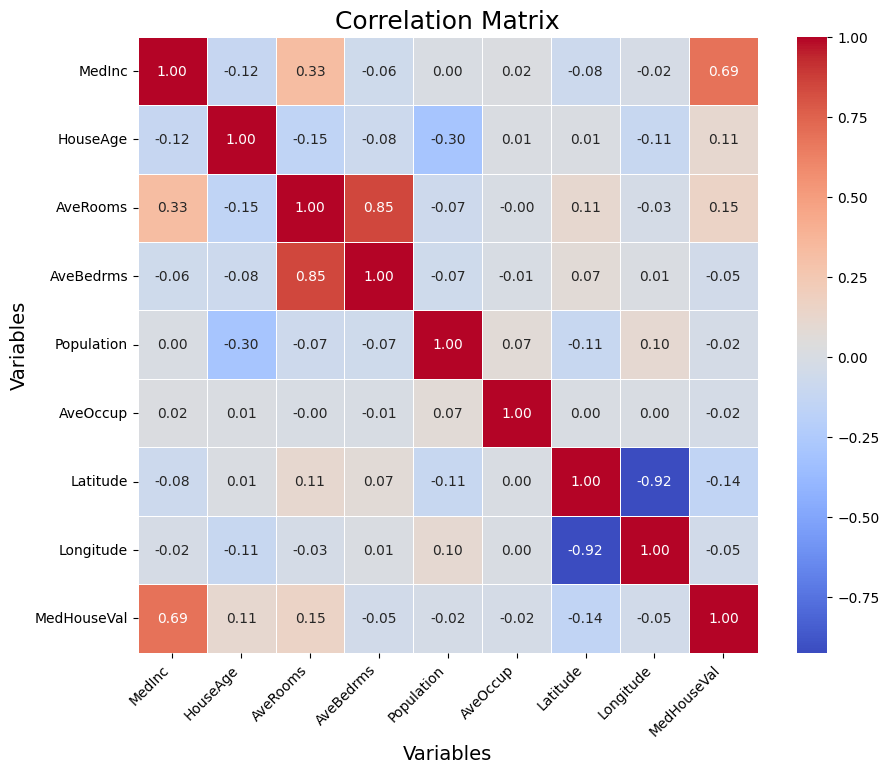

In [25]:
fig, ax=plt.subplots(figsize=(10,8))
corr_matrix=california_df.corr()
sns.heatmap(corr_matrix,annot=True,fmt='.2f', cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix", fontsize=18)
plt.xlabel("Variables", fontsize=14) 
plt.ylabel("Variables", fontsize=14)
# Customize the tick Labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels (), rotation=0, horizontalalignment='right')
plt.show()

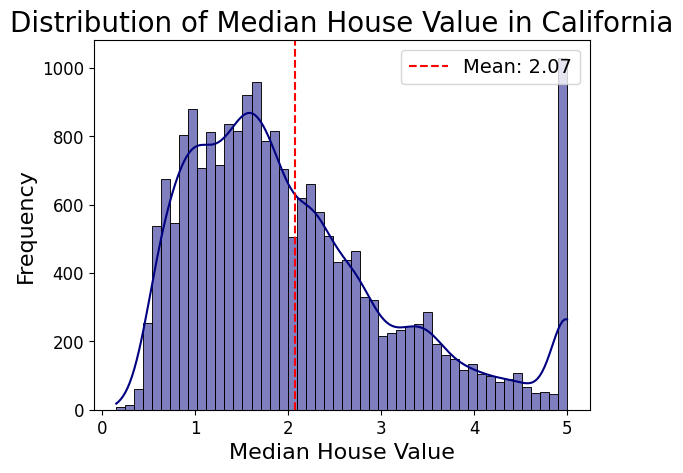

In [29]:
# Set figure size and font scale plt.figure(figsize=(8, 6)) sns.set(font_scale=1.5)
# Create histogram
sns.histplot(data=california_df, x='MedHouseVal', kde=True, bins=50, color='navy')
# Set x and y axis Labels and title

plt.xlabel('Median House Value', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Median House Value in California', fontsize=20)
# Customize x and y axis tick marks and Labels
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
# Add vertical line for mean
mean = california_df [ 'MedHouseVal'].mean()
plt.axvline (mean, color='red', linestyle= '--', label=f'Mean: {mean:.2f}') 
plt.legend (fontsize=14)

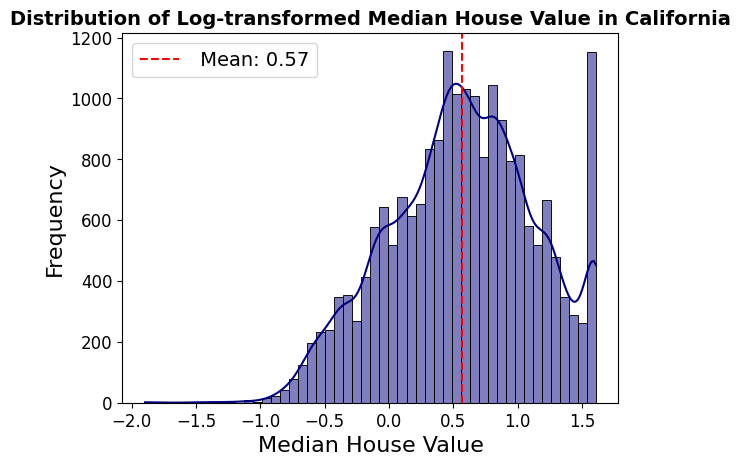

In [35]:
# Log-transform the target variable
california_df [ 'MedHouseVal_log'] = np.log(california_df[ 'MedHouseVal'])
# Set figure size and font scale plt.figure(figsize=(8, 6)) sns.set(font_scale=1.5)
# Create histogram
sns.histplot(data=california_df, x='MedHouseVal_log', kde=True, bins=50, color='navy')
# Set x and y axis labels and title
plt.xlabel('Median House Value', fontsize=16) 
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Log-transformed Median House Value in California',fontsize=14, fontweight='bold')
# Customize x and y axis tick marks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add vertical line for mean
mean = california_df [ 'MedHouseVal_log'].mean()
plt.axvline (mean, color='red', linestyle='--', label=f' Mean: {mean:.2f}') 
plt.legend (fontsize=14)
# Show the plot plt.show()

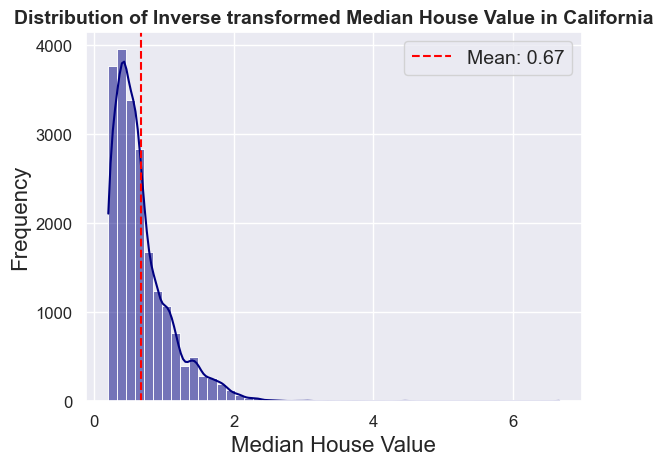

In [44]:
# Apply inverse transformation to target variable california_df[ 'MedHouseVal_inv'] = 1/california_df[ 'MedHouseVal']
# Set figure size and font scale plt.figure(figsize=(8, 6)) sns.set(font_scale=1.5)
# Create histogram
# Apply inverse transformation to target variable
california_df[ 'MedHouseVal_inv'] = 1/california_df[ 'MedHouseVal']
# Set figure size and font scale plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)
sns.histplot(data=california_df, x='MedHouseVal_inv',kde=True, bins=50, color='navy')
# Set x and y axis Labels and title
plt.xlabel('Median House Value', fontsize=16) 
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Inverse transformed Median House Value in California',
fontsize=14, fontweight='bold')
# Customize x and y axis tick marks and Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add vertical line for mean
mean = california_df[ 'MedHouseVal_inv'].mean()
plt.axvline (mean, color='red', linestyle= '--', label=f'Mean: {mean:.2f}') 
plt.legend (fontsize=14)
# Show the plot plt.show()

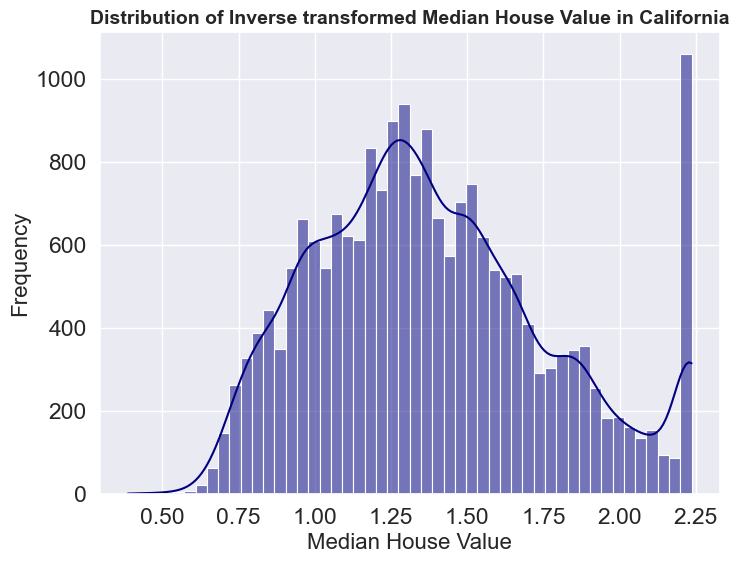

In [49]:
# Apply a square root transformation to the target variable california_df['sqrt_MedHouseVal'] = np.sqrt(california_df [ 'MedHouseVal'])
# Set figure size and font scale plt.figure(figsize=(8, 6)) sns.set(font_scale=1.5)
# Create histogram
# Apply a square root transformation to the target variable
california_df['sqrt_MedHouseVal'] = np.sqrt(california_df[ 'MedHouseVal'])
# Set figure size and font scale
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)
sns.histplot(data=california_df, x='sqrt_MedHouseVal', kde=True, bins=50, color='navy')
# Set x and y axis Labels and title
plt.xlabel('Median House Value', fontsize=16) 
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Inverse transformed Median House Value in California',
fontsize=14, fontweight='bold')
plt.show()

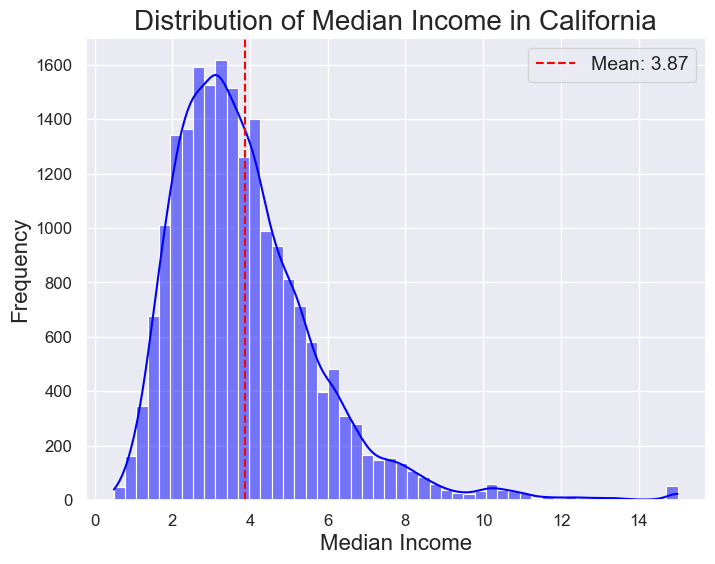

In [55]:
# Set figure size and font scale 
plt.figure(figsize=(8, 6)) 
sns.set(font_scale=1.5)
# Create histogram
sns.histplot(data=california_df, x='MedInc', kde=True, bins=50, color='blue', edgecolor='white')
# Set x and y axis Labels and title
plt.xlabel('Median Income', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Median Income in California', fontsize=20)
# Customize x and y axis tick marks and labels
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
# Add vertical line for mean
mean = california_df[ 'MedInc'].mean()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.legend (fontsize=14)
# Show the plot plt.show()

In [109]:
Q1 =california_df[ 'MedInc'].quantile (0.25)
Q3 = california_df[ 'MedInc'].quantile (0.75)
# Calculate the IQR
IQR = Q3-Q1
# Define the Lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
# Create a new dataframe without outliers
california_df_no_outliers = california_df [(california_df[ 'MedInc'] >= lower_bound)]
# Set figure size and font scale


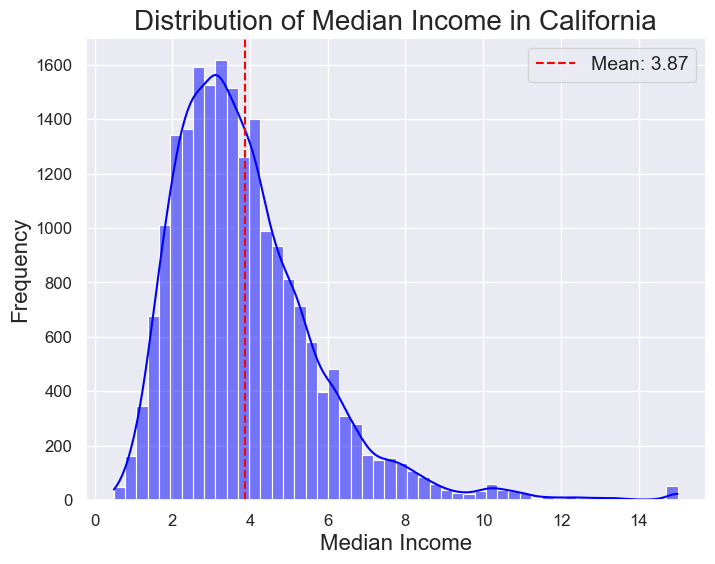

In [110]:
plt.figure(figsize=(8, 6)) 
sns.set(font_scale=1.5)
# Create histogram
sns.histplot(data=california_df_no_outliers, x='MedInc', kde=True, bins=50,color='blue', edgecolor='white')
# Set x and y axis Labels and title
plt.xlabel('Median Income', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Median Income in California', fontsize=20)
# Customize x and y axis tick marks and Labels
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
# Add vertical line for mean
mean = california_df[ 'MedInc'].mean()
plt.axvline (mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}') 
plt.legend (fontsize=14)
# Show the plot plt.show()

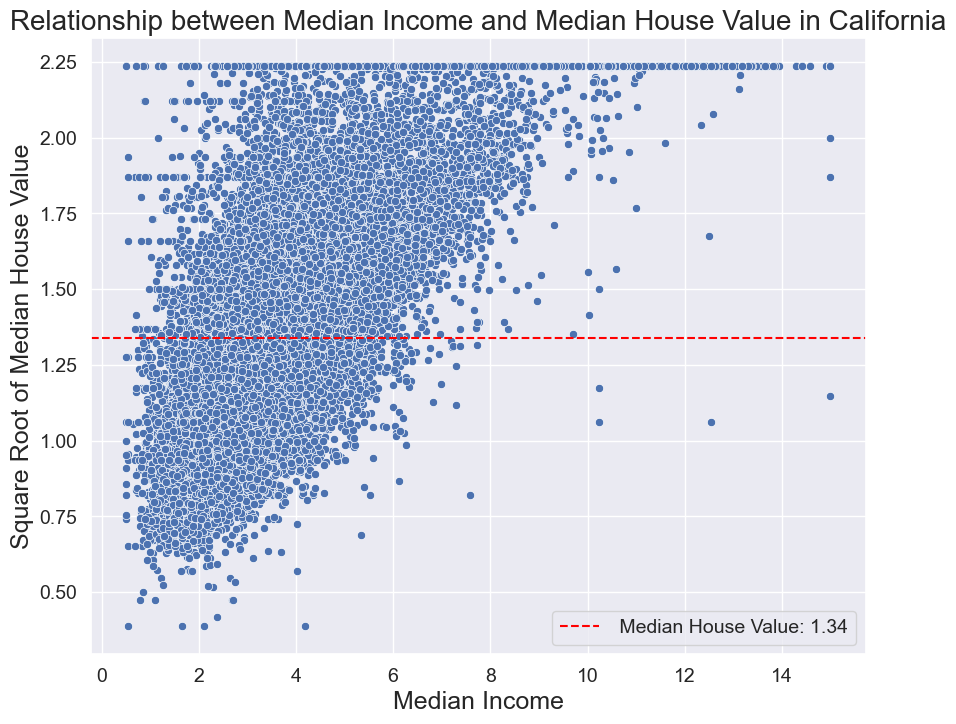

In [114]:
# Set figure size and font scale 
plt.figure(figsize=(10, 8)) 
sns.set(font_scale=1.5)
# Create scatter plot
sns.scatterplot(data=california_df_no_outliers, x='MedInc', y='sqrt_MedHouseVal',palette="deep")
# Set x and y axis Labels and title
plt.xlabel('Median Income', fontsize=18)
plt.ylabel('Square Root of Median House Value', fontsize=18)
plt.title('Relationship between Median Income and Median House Value in California', fontsize=20)
# Customize x and y axis tick marks and Labels
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)
# Add horizontal line for median house value
median_house_value = california_df_no_outliers ['sqrt_MedHouseVal'].median() 
plt.axhline(median_house_value, color='red', linestyle='--', label=f' Median House Value: {median_house_value:.2f}') 
plt.legend (fontsize=14)
# Show the plot
plt.show()

In [106]:
from sklearn.model_selection import train_test_split

X = california_df_no_outliers[['MedInc']]
y = california_df_no_outliers['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.30)

In [107]:
lr=LinearRegression()

In [108]:
# Create a grid of possible intercept values to try
intercept_grid={'fit_intercept': [True, False], 'copy_X': [True, False],'normalize': [True, False]}

In [103]:
# # Use cross-validation to find the best intercept value 
# grid_search= GridSearchCV(lr, intercept_grid, cv=5)
# grid_search.fit(X_train, y_train)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].